#Analyse NZZ

Im folgenden Jupiter Notebook wird der Datensatz der gecrawlten NZZ Webseite - Themenbereich "Krieg in der Ukraine" (https://www.nzz.ch/international/krieg-gegen-die-ukraine) Schritt für Schritt analysiert und entsprechende Schlüsse daraus gezogen. In einem ersten Arbeitsschritt wird das Datenset eingelesen und die enthaltenen Datentypen analysiert

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = "drive/MyDrive/Colab Notebooks"

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
NZZ = pd.read_excel("drive/MyDrive/Colab Notebooks/NZZ_dubl_enft.xlsx")

## 1) Analysieren des Datensets

In [5]:
NZZ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Titel   178 non-null    object        
 1   Datum   178 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 2.9+ KB


In [6]:
len(NZZ)

178

Im Datenset sind richtigerweise zwei Datentypen vorhanden. Dies ist der Datentyp Object, auch String genannt, also eine Abfolge von Buchstaben und Zahlen, sowie der Datentyp datetime, der Zeit- und Datumsangaben zusammenfasst.
Da die Artikel auf der Seite bestehen bleiben und laufend neue Artikel erscheinen, gibt es auch Dublikate der Artikel im Datenset. Die Duplikate wurden bereits im Excel mittels der Funktion "Duplikate entfernen" entfernt, wir überprüfen dies jedoch mittels der folgenden Funktion noch einmal:

In [7]:
NZZ.drop_duplicates(subset ="Titel",
                     keep = False, inplace = True)

In [8]:
len(NZZ)

176

In [9]:
NZZ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 1 to 177
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Titel   176 non-null    object        
 1   Datum   176 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 4.1+ KB


Es wurden nochmals zwei Duplikate erkannt und entfernt.

## Textanalyse: Wortwolke

Um den Text zu analysieren müssen wir zuerst die Wörter entfernen, die keinen Informationsgehalt haben. Dies wären z.B. "der", "es" etc. Diese sogenannten "Signalwörter" ermitteln wir mit der Bibliothek nltk.corpus stopwords.

In [10]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
german_stop_words = stopwords.words('german')
german_stop_words

['aber',
 'alle',
 'allem',
 'allen',
 'aller',
 'alles',
 'als',
 'also',
 'am',
 'an',
 'ander',
 'andere',
 'anderem',
 'anderen',
 'anderer',
 'anderes',
 'anderm',
 'andern',
 'anderr',
 'anders',
 'auch',
 'auf',
 'aus',
 'bei',
 'bin',
 'bis',
 'bist',
 'da',
 'damit',
 'dann',
 'der',
 'den',
 'des',
 'dem',
 'die',
 'das',
 'dass',
 'daß',
 'derselbe',
 'derselben',
 'denselben',
 'desselben',
 'demselben',
 'dieselbe',
 'dieselben',
 'dasselbe',
 'dazu',
 'dein',
 'deine',
 'deinem',
 'deinen',
 'deiner',
 'deines',
 'denn',
 'derer',
 'dessen',
 'dich',
 'dir',
 'du',
 'dies',
 'diese',
 'diesem',
 'diesen',
 'dieser',
 'dieses',
 'doch',
 'dort',
 'durch',
 'ein',
 'eine',
 'einem',
 'einen',
 'einer',
 'eines',
 'einig',
 'einige',
 'einigem',
 'einigen',
 'einiger',
 'einiges',
 'einmal',
 'er',
 'ihn',
 'ihm',
 'es',
 'etwas',
 'euer',
 'eure',
 'eurem',
 'euren',
 'eurer',
 'eures',
 'für',
 'gegen',
 'gewesen',
 'hab',
 'habe',
 'haben',
 'hat',
 'hatte',
 'hatten',
 '

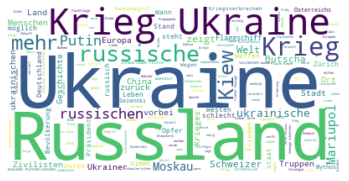

In [12]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text ='Business as usual ist auch mit China nicht mehr möglich Krieg in der Ukraine : Russische Armee beschiesst Stadt bei Odessa Kaum Evakuierungen aus Mariupol Heftige Kämpfe um Kiew Russische Truppen aus mehreren Städten vertrieben Wo wird in der Ukraine derzeit gekämpft Unsere Karte zeigt den Stand des russischen Vormarschs Gazprom steigt aus der deutschen Tochterfirma aus. Daran hängen auch die Schweizer Unternehmen des russischen Konzerns Einige Einwohner von Mariupol können belagerte Stadt verlassen Ich bin ganz allein das stille Leiden der Opfer im Grollen des Krieges Joe Biden will den Erdölmarkt mit Bürokratie zähmen mit der grössten Freigabe strategischer Reserven aller Zeiten Wir Psychologen sind in derselben Lage wie unsere Klienten Vier Szenarien zum Ende des Ukraine Kriegs Der Westen ist naiv Auch wenn Putin verschwindet, wird sich Russland nicht verändern Russland will nur noch Rubel für sein Erdgas aber die Europäer können trotzdem weiterhin in Euro überweisen Russland hält sich nicht an Versprechen zur Deeskalation in der Ukraine Wo sind die russischen Top Hacker Ich weiss, dass Russland sie irgendwo einsetzt Raketenschild aus Israel Wäre Deutschland darunter sicher Satellitenbilder verändern unseren Blick auf den Krieg , aber auch den Konflikt selbst – das birgt Gefahren Der Krieg in der Ukraine in Bildern Wie können sie uns befreien, wenn sie uns umbringen? Die moskautreuen Orthodoxen geraten in der Ukraine zwischen die Fronten Die Ukrainer verteidigen ihr Land und nehmen eigene Opfer in Kauf. Ein gerechter Grund für einen Krieg ist aber kein Freibrief Entführungen, Vergewaltigungen und die Deportation von Zivilisten: Russland errichtet ein Terrorregime in den besetzten Gebieten Wie ein chinesischer Blogger aus Odessa die Zensoren in Peking provoziert Die Welt kann noch nicht auf einen raschen Frieden in der Ukraine hoffen Schickt Russland ethnische Minderheiten als Kanonenfutter in die Ukraine Die Friedensverhandlungen zwischen Russland und der Ukraine kommen voran Moskau verspricht weniger Kampfhandlungen Zu wenig Kraft, schlecht aufgeklärt, kein Überraschungseffekt: Blamiert sich die russische Armee in der Ukraine Eine Zürcherin nimmt ukrainische Flüchtlinge auf – und fühlt sich vom Staat alleingelassen Bei Norwegens Finnmark senkt sich der Eiserne Vorhang Der Luzerner Oligarch und der verschrottete Ferrari die Geschichte einer russisch schweizerischen Freundschaft Fünf Wochen Krieg in der Ukraine , und die russische Bilanz sieht schlecht aus. Wird Putin nun wirklich die Strategie anpassen Die Nichts wie weg Strategie in Russland birgt auch Risiken Auch die Nowaja Gaseta fällt Russlands Zensur zum Opfer  damit ist die freie Presse verschwunden oder ausgesperrt Welche Folgen der Krieg in Europa für die Welt hat Italien war das Sehnsuchtsland reicher Russen. Das ist jetzt vorbei Russland hat in der Schlacht um Kiew eine verheerende Niederlage erlitten Krieg in der Ukraine : Nach Rückzug russischer Truppen aus Kiew verlagern sich Kämpfe in den Osten Rotes Kreuz versucht erneut Zivilisten aus Mariupol zu evakuieren Die Russen ziehen vom Flughafen Hostomel ab – diese Karte zeigt den Stand des Krieges Wechselstimmung oder weiter wie bisher? Die Opposition und Orban führen in Ungarn Wahlkämpfe in Parallelwelten Schlecht für das Land, aber gut für die Republikaner Biden kippt Covid-Sonderregel, mit der Trump die Grenze zu Mexiko verriegelt hatte Ramadan beginnt Ukraine Krieg sorgt für hohe Preise zum Fastenmonat Wirtschaft: Zeit günstiger Rohstoffe ist laut Chef von Rohstoffkonzern vorbei US Angestellte von Amazon gründen Gewerkschaft Die Ukraine Flaggen in Zürich bleiben noch bis zum Sechseläuten gehisst Der Fall Maxwell: Verfahren gegen Ghislaine Maxwell muss nicht wiederholt werden Kultur: Will Smith tritt nach Ohrfeige aus Filmakademie aus Selbst in der LGBTQ-Bewegung gehen sie irgendwie etwas unter. Der schwere Stand der Bisexuellen Über die Lieblingsfrucht des Sonnenkönigs und das Know-how der Benediktiner: Die Geschichte von Äpfeln und Birnen Ist Martullos Sprachdiktat kulturelle Aneignung Wieso gewinnen die Grünliberalen jede Wahl? Über die Partei, die die Zukunft umarmt Ein alter Hausarzt kämpft gegen die Krankenkassen – und um seine Ehre Der Kanton Zürich schliesst weitere Impfzentren – das Impftram ist schon auf dem Weg zum Schrottplatz Die Fankurven bringen sich wiederholt selber in Not – und haben dazu eine Stimme verloren Im Zweifel gegen den Westen: China will sich nicht auf die richtige Seite der Geschichte ziehen lassen Säen oder vor dem Krieg kapitulieren? Die Bauern in der Ukraine stehen vor einem schweren Entscheid Waffen an die Ukraine : Verteidigungsministerin Lambrecht gerät unter Rechtfertigungsdruck Micky Maus wird zum LGBTQ-Aktivisten Fredy Knie: Als ich vom Pony fiel, nahm mich mein Vater an der Hand und sagte: Jetzt nicht weinen, Fredy, erst hinter dem Vorhang Knausern für die Freiheit: Florian Wagner lebt sparsam, um mit 40 in Rente zu gehen – weil das Leben für lange Tage im Büro zu kurz ist Ich kümmere mich um Obdachlose. Manchmal ist es, als wollte ich das Meer mit einem Löffel ausschöpfen Die Kunst seiner Kleckse – der Mann hinter dem Rorschachtest Die Sorge um das Klima ist keine Krankheit Nach dem Angriffskrieg: die Geburt des geopolitischen Europa Inflation: Lohnerhöhungen sind unvermeidlich Unterricht in Deutschland nach ukrainischen Massstäben Wenn eines klar ist, dann dass die Falklandinseln nicht britisch sind – Argentiniens Präsident erneuert Anspruch auf Falklandinseln Missbrauch der katholischen Kirche: Papst entschuldigt sich bei Indigenen – Reise nach Kanada möglich Soll der Bund mit einer Preis-Meldepflicht für Tankstellen den Benzinpreisschub bremsen Im Banking wie im Leben helfen Nahtoderlebnisse, um den Verstand zu fokussieren Bei Krypto-Banken nichts Neues – oder doch Der SMI und andere Börsenindizes liegen höher als vor dem Ausbruch des Ukraine Kriegs – Anleger haben hohe Erwartungen an die Unternehmensgewinne Ein Immobilienmarkt im Ausnahmezustand: Wie der Lonza-Effekt die Nachfrage im Oberwallis explodieren lässt Die Bevölkerung wäre bereit, 60 Prozent ihres Gehaltes herzugeben, um Schulschliessungen zu vermeiden Das Tessin erwartet eine neue Welle von Deutschschweizern I schänke dr mis Härz Der Segensroboter ist eine Weltneuheit und steht in Zürich. Der Theologieprofessor Thomas Schlag sagt: Als ich davorstand, begann ich zu staunen Die Klimaangst geht um – weshalb zwei Politikerinnen Angebote gegen die unter Jugendlichen grassierende Sorge ums Klima fordern Irgendwie fühle ich mich nackt, sagt eine Frau: wie Zürcher Passagiere im öffentlichen Verkehr den ersten Tag ohne Maskenpflicht erleben Die Schweizer Fussballer wissen, wie viel an der WM in Katar zu verlieren ist Die Gruppen der Fussball-WM in Katar sind ausgelost – das Schweizer Nationalteam ist in einer Hammergruppe Ein Katastrophenjahr Der HC Davos kämpft auf und neben dem Eis um seine Zukunft «Wenn der Krieg vorbei ist, fahre ich wieder nach Kiew. Ich kaufe mir eine Kiewer Torte und einen Strauss Flieder» – Hommage an den schönsten und schrecklichsten Ort der Welt Wenn der Krieg vorbei ist, fahre ich wieder nach Kiew. Ich kaufe mir eine Kiewer Torte und einen Strauss Flieder – Hommage an den schönsten und schrecklichsten Ort der Welt Kriegstagebuch aus Charkiw Rosa Flugzeuge aus Russland Krieg in der Ukraine : Der Traum vom ewigen Frieden ist geplatzt. Aber das zeigt vielleicht nur, dass wir nicht verstanden haben, was Friede ist Im Silicon Valley arbeiten Forschende daran, das Altern rückgängig zu machen. Bei Mäusen funktioniert das schon. Nun werden Studien mit Menschen durchgeführt Mehr als 200 Farben erkennt dieser Satellit – mit seinen Kameras kann er Mineralien, Nährstoffe und Schadstoffe detektieren Es wird wieder frostig – ein Tief über Norditalien bringt den Winter zurück Frankreich wählt – die Frage ist nur, wen Kolumbiens Traumfischer Knabbergebäck aus Mais Ideen für das nasskalte Wochenende Drei Beispiele der besten Rotweinsorte Österreichs Die sanfte Landung ist ein Mythos Leerverkäufer intensivieren Wette auf Zur Rose China steht in einem Konflikt zwischen seiner Politik und seiner Wirtschaft Putin ist kein Selbstmörder, der sich in einen zerstörerischen Atomkrieg stürzen will Krieg in der Ukraine : Nato bestätigt Einsatzbereitschaft von neuen Truppen an der Ostflanke Selenski befürchtet, dass Russland Spuren von Kriegsverbrechen verwischen will Die abziehenden Russen hinterlassen ein Blutbad – eine visuelle Einordnung der Kriegsfakten Wir kämpfen aus Liebe, nicht aus Hass – wie der russische Staat den Krieg in der Ukraine zu legitimieren versucht The consequences of war in Europe for the rest of the world Die Bilder aus Butscha: Der ukrainische Fotograf Vadim Ghirda dokumentierte die Menschen, wie er sie vor Ort vorfand Plant Russland die Schaffung einer neuen Volksrepublik in Cherson Wie Elon Musk und Emmanuel Macron den Ukraine Krieg in Social Media zum Theater machen Russen hinterlassen Szenen des Grauens in Vororten von Kiew Russland hat ein Blutbad an der ukrainischen Bevölkerung angerichtet – jetzt muss der Westen mehr für deren Schutz tun Der freundliche Herr Stoltenberg soll Putin in Schach halten Die Moldau – Land mit dramatischer Geschichte im Schatten des Ukraine Kriegs Ukrainer in der Welt – wo sie vor dem Krieg lebten und wohin sie nun flüchten Erster Teilerfolg bei Evakuierung von belagerter Stadt Mariupol Wahrscheinlicher ist, dass Putin eines Tages einfach einen Sieg verkünden wird Krieg in der Ukraine : Bereits 7,1 Millionen in der Ukraine auf der Flucht Tschechien liefert T-72-Kampfpanzer an Ukraine Die abziehenden Russen hinterlassen Tod und Zerstörung – eine visuelle Einordnung der Kriegsfakten Die verstörenden Bilder aus Butscha: Der ukrainische Fotograf Vadim Ghirda dokumentierte die Menschen, wie er sie vor Ort vorfand Liebe westeuropäische Intellektuelle: Ihr habt keine Ahnung von Russland Krieg in der Ukraine : Russland setzt Angriffe auf Mariupol fort Videoaufnahme zeigt Erschiessung eines Velofahrers in Butscha Istanbul wird nach hundert Jahren wieder zu einer Drehscheibe der russischen Emigration Die Schattenseiten der Solidarität mit der Ukraine Eurochem: Grossbanken sperren russisch-schweizerischem Konzern die Konten, obwohl er nicht sanktioniert ist Krieg in der Ukraine : Uno-Vollversammlung suspendiert Russlands Mitgliedschaft im Menschenrechtsrat Nato-Mitglieder beschliessen Intensivierung der Waffenlieferungen Inszenierung in Butscha – Russlands Staat und Gesellschaft wollen mit dem Verbrechen nichts zu tun haben Japan wirft alte Grundsätze über Bord und will stark in seine Rüstung investieren Wegen des Ukraine Kriegs? China stoppt Vorführung eines Schweizer Films – Bern protestiert Justizministerin Keller-Sutter: Ich bin entsetzt. Das sind klare Hinweise auf Kriegsverbrechen Panzer, Artillerie, Kampfflugzeuge: was die Ukraine braucht, um die Angreifer entscheidend zu schlagen Die radikale russische Propaganda befeuert die Debatte um einen Genozid in der Ukraine Warum Augenmass bei der Beschreibung der Schrecken des Krieges wichtig ist Sie schrieben die Namen der Toten an die Wand: Ukrainische Dorfbewohner mussten wochenlang in einem Schulkeller ausharren Krieg in der Ukraine : Mindestens 39 Tote und über 100 Verletzte bei Raketenangriff auf Bahnhof – Kreml weist Verantwortung zurück Der Mythos von Russlands Elitetruppen wird in der Ukraine entzaubert Im Ukraine Krieg nimmt die Verrohung der Soldaten mit hohem Tempo zu Eurochem: Grossbanken sperren russisch-schweizerischem Düngemittelriesen die Konten, obwohl er nicht sanktioniert ist Ein Schock mit Ankündigung – eine Rekonstruktion der Ereignisse in Butscha Krieg in der Ukraine : Britischer Premierminister Boris Johnson trifft Selenski in Kiew EU bezeichnet russischen Angriff auf Bahnhof in Kramatorsk als Kriegsverbrechen Mit Bulldozern nach Tschernobyl: Russische Soldaten haben Gräben in verseuchtem Gebiet ausgehoben Wann ist der russische Mann ein Mann Deutsche und russische Städte waren jahrzehntelang Partner – jetzt kehrt der Kalte Krieg zurück Für Russland ist die Schweiz nicht mehr neutral – diese sucht in der Krise ihre Rolle Die Ukraine braucht mehr schwere Waffen zur Verteidigung Europas – und zwar dringend 50 Personen werden bei einem Raketenangriff auf den Bahnhof in Kramatorsk getötet – das zeigt, wie schwierig es für Zivilisten ist, zu fliehen Krieg in der Ukraine : Massengrab in Busowa entdeckt russischer Militärkonvoi zieht gen Süden neun humanitäre Korridore geöffnet Für Russland ist die Schweiz nicht mehr neutral – der Bundesrat sucht in der Krise seine Rolle In Kiew blüht das Leben auf. Die Stadt ist der russischen Eroberung entronnen und zum Symbol des ukrainischen Widerstandes geworden Krieg in der Ukraine : Scharfe Kritik an Nehammers Reise zu Putin Tschetschenischer Präsident kündigt Offensive auf ukrainische Städte und Dörfer an Auch im Türkei-Tourismus hinterlässt der Krieg in der Ukraine Spuren In der Hafenstadt Mariupol zeigt sich exemplarisch die Grausamkeit der russischen Kriegsführung Russland wirft mehr als ein Dutzend ausländische Organisationen aus dem Land – der Raum für die Zivilgesellschaft wird immer enger Russland sendet einen langen Militärkonvoi in die Ostukraine – doch die Vorbereitung der nächsten Offensive kommt nur langsam voran Schweizer Ex-Richter am Kriegsverbrecher-Tribunal: Es ist unwahrscheinlich, dass Putin in einer Gefängniszelle landet und vor Gericht gestellt wird In ihrem Winterkrieg kämpften die Finnen wie Löwen gegen Moskaus Übermacht – genau wie die Ukrainer heute Krieg in der Ukraine : Russische Truppen bereiten Angriff im Osten vor Putin zu Treffen mit Lukaschenko im Osten Russlands eingetroffen Österreichs Kanzler in Moskau: Dieses Signal nützt Russland wohl mehr als der Ukraine Ein Militärpsychologe zu den Greueltaten in der Ukraine : Die Ausnahmesituation eines Krieges kann aus einem Menschen fast alles machen Brüssel nimmt russische Banken, Airlines und Öl ins Visier Österreichs Kanzler auf Friedensmission in Moskau – Putin hat wenig Gehör für die Forderungen der Europäer Wegen des Ukraine Kriegs sind russische Diplomaten in vielen Staaten nicht mehr willkommen Marina Owsjannikowa protestierte im russischen Fernsehen – nun arbeitet sie als freie Korrespondentin für die Welt Warum Papst Franziskus den Aggressor Putin nicht beim Namen nennen will Krieg in der Ukraine : Keine Fluchtkorridore für Zivilisten möglich Mehr als 1000 ukrainische Soldaten sollen sich in Mariupol ergeben haben Ukrainische Flüchtlinge kehren zurück in die Heimat: Wir hoffen auf das Beste, aber erwarten das Schlimmste Ein General mit Syrien-Erfahrung soll Russland in der Ukraine zum Sieg führen – wird ihm das gelingen Waffen an die Ukraine : Was Deutschland tut – und was nicht Die Ukraine hat einen russischen Cyberangriff abgewehrt. Er hätte das Stromnetz lahmlegen sollen Boris Johnson inszeniert sich als Selenskis treuster Verbündeter Die Erfahrung mit den syrischen Flüchtlingen in der Türkei sollte Europa eine Lehre sein Krieg in der Ukraine : Flaggschiff der Schwarzmeerflotte laut Kiew gesunken, Moskau droht mit Atomwaffen in der Ostsee-Region Weissrusslands Bevölkerung lehnt Russlands Krieg gegen die Ukraine ab – das bringt Machthaber Lukaschenko in die Klemme Das Dorf Jakowliwka ist zerstört, doch seine Bewohner bleiben – damit die Ernte gelingt Mario Draghi: Bevorzugen Sie den Frieden? Oder die eingeschaltete Klimaanlage David besiegt Goliath – weshalb Russland im Kampf um Kiew gescheitert ist Die Ukrainer kämpfen in Mariupol bis zum bitteren Ende, doch nun steht die Hafenstadt vor dem Fall Krieg in der Ukraine : USA bestätigen, dass das Kriegsschiff Moskwa von zwei ukrainischen Raketen getroffen wurde Russland weist 18 EU-Diplomaten aus Richtungswechsel in Washington: Angesichts der bevorstehenden Offensive Russlands setzen die USA nun verstärkt auf Waffenlieferungen Neuer Rückschlag für Russland im Krieg mit der Ukraine – die Schwarzmeerflotte verliert ihr Flaggschiff Das Problem ist im Kanzleramt: Die Ampelkoalition streitet wegen der Militärhilfe für die Ukraine «Lass mich mit deinen Lügen in Ruhe»: wie ein Cyber-Tool russische Propaganda per SMS entlarven will Moskau übt Vergeltung für die Versenkung seines Flaggschiffs Krieg in der Ukraine : Mindestens ein Todesopfer bei Raketenangriff auf Kiew Bürgermeister Klitschko warnt vor Rückkehr in die Hauptstadt Indien gewinnt Russland den Informationskrieg Lettlands Präsident zum Ukraine Krieg : Der Mythos der russischen Stärke ist dahin Harter Schlag für Moskaus Kriegsmarine – die Schwarzmeerflotte verliert ihr Flaggschiff'
nichtinteressant = "aber alle allem allen aller alles als also am an ander andere anderem anderen anderer anderes anderm andern anders auch auf aus bei bin bis bist da damit dann der den des dem die das dass daß derselbe derselben denselben desselben demselben dieselbe dieselben dasselbe dazu dein deine deinem deinen deiner deines denn derer dessen dich dir du dies diese diesem diesen dieser dieses doch dort durch ein eine einem einen einer eines einig einige einigem einigen einiger einiges einmal er ihn ihm es etwas euer eure eurem euren eurer eures für gegen gewesen hab habe haben hat hatte hatten hier hin hinter ich mich mir ihr ihre ihrem ihren ihrer ihres euch im indem ins ist jede jedem jeden jeder jedes jene jenem jenen jener jenes jetzt kann kein keine keinem keinen keiner keines können könnte machen man manche manchem manchen mancher manches mein meine meinem meinen meiner meines mit muss musste nach nicht nichts noch nun nur ob oder ohne sehr sein seine seinem seinen seiner seines selbst sich sie ihnen sind so solche solchem solchen solcher solches soll sollte sondern sonst über um und uns unsere unserem unseren unser unseres unter viel vom von vor während war waren warst was weg weil weiter welche welchem welchen welcher welches wenn werde werden wie wieder will wir wird wirst wo wollen wollte würde würden zu zum zur zwar zwischen"
liste_der_unerwuenschten_woerter = nichtinteressant.split()

STOPWORDS.update(liste_der_unerwuenschten_woerter)
wordcloud = WordCloud(background_color="white").generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Hinweis
Die Wortwolke ist nicht ganz eindeutig, da die beiden Wörter Ukraine und Krieg doppelt erscheinen. Zur Sicherheit wurde deshalb noch die Counter Bibliothek verwendet, um die Worthäufigkeit der Wörter zu analysieren. Die Ergebnisse der Wortwolke bestätigen sich: die drei am häufigsten vorkommenden Wörter (abzgl. Signalwörter) sind Ukraine, Krieg, Russland 

In [14]:
from collections import Counter
input_string = text
word_freqs = Counter(input_string.split())
print(word_freqs)

Counter({'der': 94, 'in': 87, 'die': 65, 'Ukraine': 54, '–': 46, 'Krieg': 34, 'und': 34, 'Die': 32, 'ist': 30, 'Russland': 25, 'den': 22, 'das': 22, 'mit': 20, ':': 20, 'für': 20, 'aus': 19, 'auf': 19, 'zu': 18, 'nicht': 17, 'Der': 16, 'im': 15, 'des': 14, 'an': 14, 'um': 13, 'von': 13, 'wie': 13, 'sich': 13, 'zum': 11, 'eine': 11, 'dem': 11, 'wird': 10, 'russischen': 10, 'Putin': 10, 'ein': 10, 'als': 10, 'vor': 10, 'Kiew': 9, 'sie': 9, 'einen': 9, 'russische': 9, 'mehr': 8, 'Mariupol': 8, 'will': 8, 'bei': 7, 'sind': 7, 'dass': 7, 'Ein': 7, 'Russlands': 7, 'nach': 7, 'ich': 7, 'Ich': 6, 'Welt': 6, 'einer': 6, 'gegen': 6, 'einem': 6, 'zeigt': 5, 'Schweizer': 5, 'aber': 5, 'ukrainische': 5, 'nun': 5, 'hat': 5, 'Das': 5, 'seine': 5, 'haben': 5, 'eines': 5, 'ist,': 5, 'er': 5, 'auch': 4, 'China': 4, 'Russische': 4, 'Stadt': 4, 'Truppen': 4, 'Krieges': 4, 'Kriegs': 4, 'Wie': 4, 'Ukrainer': 4, 'Moskau': 4, 'vom': 4, 'Geschichte': 4, 'oder': 4, 'vorbei': 4, 'Russen': 4, 'Im': 4, 'mich': 4, 